# Gym Ticket to Ride + RL

Vidya Giri

### OpenAI Gym Resources
- https://www.youtube.com/watch?v=ZxXKISVkH6Y
- https://towardsdatascience.com/creating-a-custom-openai-gym-environment-for-stock-trading-be532be3910e
- https://towardsdatascience.com/beginners-guide-to-custom-environments-in-openai-s-gym-989371673952
- https://medium.com/applied-data-science/how-to-train-ai-agents-to-play-multiplayer-games-using-self-play-deep-reinforcement-learning-247d0b440717

### Example with battleship
- https://github.com/thomashirtz/gym-battleship/blob/main/gym_battleship/environments/battleship.py
- https://github.com/thomashirtz/gym-battleship

### Ticket to Ride resources
- rules: https://www.ultraboardgames.com/ticket-to-ride/game-rules.php
- game board: https://i.pinimg.com/originals/fd/25/28/fd252885def1fdcd725ab08dadbb8c07.jpg
- destination points: https://ticket-to-ride.fandom.com/wiki/List_of_Ticket_to_Ride_Destination_Tickets
- card/material quantities: https://boardgamegeek.com/wiki/page/Ticket_to_Ride_series

### Other Ticket to Ride projects
- https://github.com/maxschorer/ticket_to_ride
- https://github.com/maxschorer/ticket_to_ride/blob/master/constants.py
- https://github.com/CodeProgress/TicketToRide/blob/master/TTRCards.py
- https://github.com/mcandocia/tickets_ai

### Part 1: Rendering the game board graphics

To start out with, gonna try to:
- display the game board
- fill in a rotated rectangle with train car
- plot all the routes
- plot all cities
- record colors and number of cars for each route

Also only going to do it as a 2-player game for now (no double routes)

Using webplotdigitizer to help with coordinates:
https://automeris.io/WebPlotDigitizer/

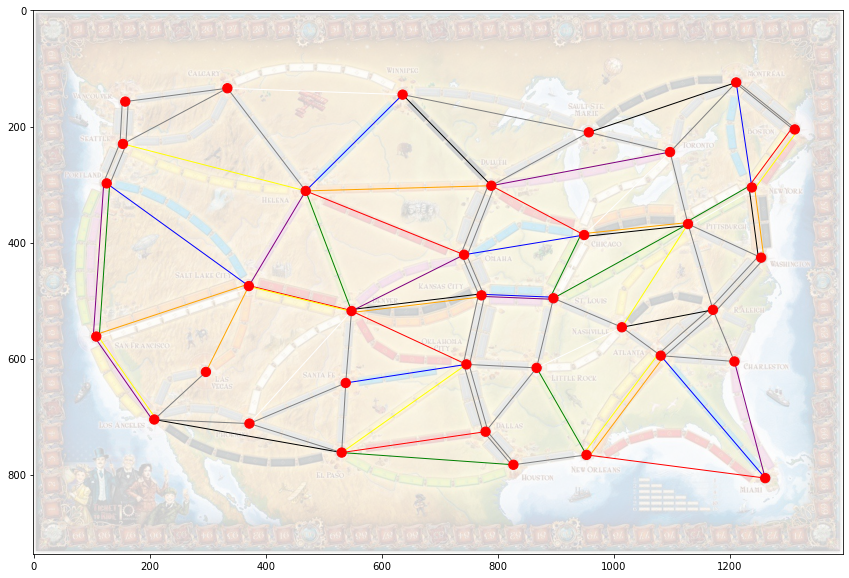

In [199]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

cities_list = {
    "atlanta": [1081,595],
    "boston": [1312,205],
    "calgary": [334,134],
    "charleston": [1208,605],
    "chicago": [949,387],
    "dallas": [779,726],
    "denver": [548,518],
    "duluth": [789,302],
    "el paso": [531,762],
    "helena": [469,311],
    "houston": [827,783],
    "kansas city": [772,491],
    "las vegas": [297,623],
    "little rock": [867,616],
    "los angeles": [208,705],
    "miami": [1261,806],
    "montreal": [1211,124],
    "nashville": [1014,546],
    "new orleans": [953,766],
    "new york": [1238,305],
    "oklahoma city": [746,610],
    "omaha": [742,421],
    "phoenix": [372,712],
    "pittsburgh": [1128,368],
    "portland": [126,298],
    "raleigh": [1171,516],
    "salt lake city": [371,475],
    "san francisco": [108,562],
    "santa fe": [538,642],
    "sault ste. marie": [957,210],
    "seattle": [154,230],
    "st. louis": [896,496],
    "toronto": [1097,244],
    "vancouver": [158,157],
    "washington": [1254,426],
    "winnipeg": [636,145],
}

#     "vancouver-calgary":{"color": "gray", "length": 3, "coordinates": [(1,1),(1,1),(1,1)]},

routes_list = {
    "atlanta-charleston": [2,"gray"],
    "atlanta-miami": [5,"blue"],
    "atlanta-nashville": [1,"gray"],
    "atlanta-new orleans": [4,"yellow-orange"],
    "atlanta-raleigh": [2,"gray-gray"],
    "boston-montreal": [2,"gray-gray"],
    "boston-new york": [2,"red-yellow"],
    "calgary-helena": [4,"gray"],
    "calgary-seattle": [4,"gray"],
    "calgary-vancouver": [3,"gray"],
    "calgary-winnipeg": [6,"white"],
    "charleston-miami": [4,"purple"],
    "charleston-raleigh": [2,"gray"],
    "chicago-st. louis": [2,"green-white"],
    "chicago-duluth": [3,"red"],
    "chicago-omaha": [4,"blue"],
    "chicago-pittsburgh": [3,"orange-black"],
    "chicago-toronto": [4,"white"],
    "dallas-el paso": [4,"red"],
    "dallas-houston": [1,"gray-gray"],
    "dallas-little rock": [2,"gray"],
    "dallas-oklahoma city": [2,"gray-gray"],
    "denver-helena": [4,"green"],
    "denver-kansas city": [4,"black-orange"],
    "denver-oklahoma city": [4,"red"],
    "denver-omaha": [4,"purple"],
    "denver-phoenix": [5,"white"],
    "denver-salt lake city": [3,"red-yellow"],
    "denver-santa fe": [2,"gray"],
    "duluth-helena": [6,"orange"],
    "duluth-omaha": [2,"gray-gray"],
    "duluth-sault ste. marie": [3,"gray"],
    "duluth-toronto": [6,"purple"],
    "duluth-winnipeg": [4,"black"],
    "el paso-houston": [6,"green"],
    "el paso-los angeles": [6,"black"],
    "el paso-oklahoma city": [5,"yellow"],
    "el paso-phoenix": [3,"gray"],
    "el paso-santa fe": [2,"gray"],
    "helena-omaha": [5,"red"],
    "helena-salt lake city": [3,"purple"],
    "helena-seattle": [6,"yellow"],
    "helena-winnipeg": [4,"blue"],
    "houston-new orleans": [2,"gray"],
    "kansas city-oklahoma city": [2,"gray-gray"],
    "kansas city-omaha": [1,"gray-gray"],
    "kansas city-st. louis": [2,"blue-purple"],
    "las vegas-los angeles": [2,"gray"],
    "las vegas-salt lake city": [3,"orange"],
    "little rock-nashville": [3,"white"],
    "little rock-new orleans": [3,"green"],
    "little rock-oklahoma city": [2,"gray"],
    "little rock-st. louis": [2,"gray"],
    "los angeles-phoenix": [3,"gray"],
    "los angeles-san francisco": [3,"purple-yellow"],
    "miami-new orleans": [6,"red"],
    "montreal-new york": [3,"blue"],
    "montreal-sault ste. marie": [5,"black"],
    "montreal-toronto": [3,"gray"],
    "nashville-pittsburgh": [4,"yellow"],
    "nashville-raleigh": [3,"black"],
    "nashville-st. louis": [2,"gray"],
    "new york-pittsburgh": [2,"green-white"],
    "new york-washington": [2,"black-orange"],
    "oklahoma city-santa fe": [3,"blue"],
    "phoenix-santa fe": [3,"gray"],
    "pittsburgh-raleigh": [2,"gray"],
    "pittsburgh-st. louis": [5,"green"],
    "pittsburgh-toronto": [2,"gray"],
    "pittsburgh-washington": [2,"gray"],
    "portland-salt lake city": [6,"blue"],
    "portland-san francisco": [5,"purple-green"],
    "portland-seattle": [1,"gray-gray"],
    "raleigh-washington": [2,"gray-gray"],
    "salt lake city-san francisco": [5,"orange-white"],
    "sault ste. marie-toronto": [2,"gray"],
    "sault ste. marie-winnipeg": [6,"gray"],
    "seattle-vancouver": [1,"gray-gray"],
}

train_car_point_values={
    1:1,
    2:2,
    3:4,
    4:7,
    5:10,
    6:15,
}

# 30 destination tickets
destination_tickets=[
 {'cities': ['boston', 'miami'], 'points': 12},
 {'cities': ['calgary', 'phoenix'], 'points': 13},
 {'cities': ['calgary', 'salt lake city'], 'points': 7},
 {'cities': ['chicago', 'new orleans'], 'points': 7},
 {'cities': ['chicago', 'santa fe'], 'points': 9},
 {'cities': ['dallas', 'new york'], 'points': 11},
 {'cities': ['denver', 'el paso'], 'points': 4},
 {'cities': ['denver', 'pittsburgh'], 'points': 11},
 {'cities': ['duluth', 'el paso'], 'points': 10},
 {'cities': ['duluth', 'houston'], 'points': 8},
 {'cities': ['helena', 'los angeles'], 'points': 8},
 {'cities': ['kansas city', 'houston'], 'points': 5},
 {'cities': ['los angeles', 'chicago'], 'points': 16},
 {'cities': ['los angeles', 'miami'], 'points': 20},
 {'cities': ['los angeles', 'new york'], 'points': 21},
 {'cities': ['montreal', 'atlanta'], 'points': 9},
 {'cities': ['montreal', 'new orleans'], 'points': 13},
 {'cities': ['new york', 'atlanta'], 'points': 6},
 {'cities': ['portland', 'nashville'], 'points': 17},
 {'cities': ['portland', 'phoenix'], 'points': 11},
 {'cities': ['san francisco', 'atlanta'], 'points': 17},
 {'cities': ['sault ste. marie', 'nashville'], 'points': 8},
 {'cities': ['seattle', 'los angeles'], 'points': 9},
 {'cities': ['seattle', 'new york'], 'points': 22},
 {'cities': ['sault ste. marie', 'oklahoma city'], 'points': 9},
 {'cities': ['toronto', 'miami'], 'points': 10},
 {'cities': ['vancouver', 'montreal'], 'points': 20},
 {'cities': ['vancouver', 'santa fe'], 'points': 13},
 {'cities': ['winnipeg', 'houston'], 'points': 12},
 {'cities': ['winnipeg', 'little rock'], 'points': 11},
]

# function to plot a city
def plot_city(cities_list, city_name):
    point_size = 8
    circle1 = plt.Circle((cities_list[city_name][0], cities_list[city_name][1]), point_size, color='red', fill=True, zorder=10)
    plt.gca().add_patch(circle1)

# function to plot a route
def plot_route(routes_list, cities_list, route_name):
    cities = route_name.split('-')
    point1 = cities_list[cities[0]]
    point2 = cities_list[cities[1]]
    
    if (len(routes_list[route_name][1].split('-')))==2:
        
        route_color1 = routes_list[route_name][1].split('-')[0]
        route_color2 = routes_list[route_name][1].split('-')[1]
        
        x_values = [point1[0]-5, point2[0]-5]
        y_values = [point1[1]-2, point2[1]-2]
        plt.plot(x_values, y_values, color=route_color1, lw=1)
        
        x_values = [point1[0]+5, point2[0]+5]
        y_values = [point1[1]+2, point2[1]+2]
        plt.plot(x_values, y_values, color=route_color2, lw=1)

    else:
        route_color = routes_list[route_name][1].split('-')[0]
        
        x_values = [point1[0], point2[0]]
        y_values = [point1[1], point2[1]]
        plt.plot(x_values, y_values, color=route_color, lw=1)

# display the image of the board! (usa edition of the game)
fig, ax = plt.subplots(figsize=(15,10))
# plt.imshow(Image.open('ticket-to-ride.jpg'), alpha = 1)
plt.imshow(Image.open('ticket-to-ride.jpg'), alpha = 0.2)

# iterate through routes_list dictionary to plot all routes on board with lines
for route in routes_list:
    plot_route(routes_list,cities_list,route)
    
# iterate through cities_list dictionary to plot all cities on board with circle
for city in cities_list:
    plot_city(cities_list,city)

#test plotting of train with rectangle!, later put this into the plot_route function
# plt.gca().add_patch(Rectangle((141,170),13,42,
#                     angle=3,
#                     edgecolor='magenta',
#                     facecolor='none',
#                     lw=0.5));

next:
- dict of train car coordinates for every route (use digitizer)


then: 
- implement the rules as a gym environment
    - beginning of game/setup
    - turn actions
    - point scoring
    - end of game, longest route
    - summary of other pieces:
        - 45 train pieces for each player
        - 96 train cards (12 each in red, orange, yellow, green, blue, purple, black, white)
        - 14 locomotive (multicolored for the wild card/gray spaces)